# Weekly Activity (Tutorial 7)

## Directory

In [1]:
import os 
os.chdir("C:/Users/yichu/Desktop/yichun/UTAR/Y2S3/Mini Project/Week 7/Week 7")

In [2]:
%pwd

'C:\\Users\\yichu\\Desktop\\yichun\\UTAR\\Y2S3\\Mini Project\\Week 7\\Week 7'

## Setup

In [3]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

### Activity 1
Apply histogram equalization on a histogram equalized image. In other words, apply histogram equalization twice on an image. Is there any difference between the first and second output image? You are free to use any image.

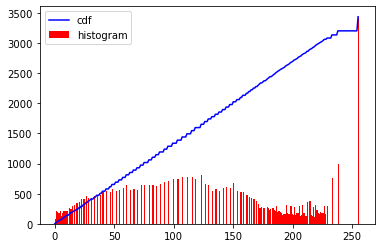

In [4]:
img = cv.imread('dog1.jfif', 0)

eq1 = cv.equalizeHist(img)

hist = cv.calcHist([eq1], [0], None, [256], [0,256]) # 256 is excluded

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(eq1.flatten(), 256, [0,256], color = 'r')
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show() 

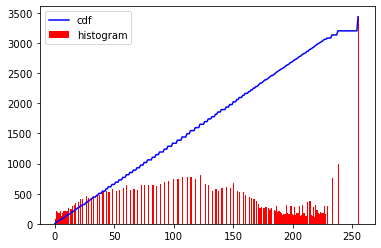

In [5]:
eq2 = cv.equalizeHist(eq1)

hist = cv.calcHist([eq2], [0], None, [256], [0,256]) # 256 is excluded

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(eq2.flatten(), 256, [0,256], color = 'r')
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show() 

In [6]:
cv.imshow('Result: img, eq1, eq2', np.hstack((img, eq1, eq2)))
cv.waitKey(0)
cv.destroyAllWindows()

#### Comment: 
If histogram equalization is applied twice, there is **no change**. This is because a histogram equalization is **idempotent**. In other words, the value of the histogram equalization does not change when it is multiplied by itself

### Activity 2
Load the image 'electronic.jfif'. Then,
1. Experiment with different kernel size. Which kernel size is the most appropriate?
2. Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.
3. Try Laplacian of Gaussian

In [8]:
import warnings
warnings.filterwarnings("ignore")
# 1
def thresh_callback(val):
    kernel_size = val
   
    sobelx = cv.convertScaleAbs(np.absolute(cv.Sobel(img, cv.CV_64F, 1, 0, ksize=kernel_size)))
    sobely = cv.convertScaleAbs(np.absolute(cv.Sobel(img, cv.CV_64F, 0, 1, ksize=kernel_size)))
    sobelxy = cv.bitwise_or(sobelx,sobely)
    
    cv.imshow('result', sobelxy)
    
img = cv.imread('electronic.jfif', 0)
blur = cv.GaussianBlur(img,(3,3),0)

# define another window
name_window = 'source'
cv.namedWindow(name_window)
cv.imshow(name_window, img)

max_thresh = 10
thresh = 1
cv.createTrackbar('ksize: ', name_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)

cv.waitKey(0)
cv.destroyAllWindows() 

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\deriv.cpp:104: error: (-211:One of the arguments' values is out of range) The kernel size must be odd and not larger than 31 in function 'cv::getSobelKernels'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\deriv.cpp:104: error: (-211:One of the arguments' values is out of range) The kernel size must be odd and not larger than 31 in function 'cv::getSobelKernels'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\deriv.cpp:104: error: (-211:One of the arguments' values is out of range) The kernel size must be odd and not larger than 31 in function 'cv::getSobelKernels'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\deriv.cpp:104: error: (-211:One of the arguments' values is out of range) The kernel size must be odd and not larger than 31 in function 'cv::getSobelKernels'


### Comment
Kernel size = 1 is the most appropriate as it has minimum background noises.

In [11]:
# 2.
img = cv.imread('electronic.jfif', 0)

# Without image smoothing 
sobelx1 = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = 1)
sobely1 = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 1)
sobelxy1 = cv.bitwise_or(sobelx1,sobely1)
sobelxy1_8u = cv.convertScaleAbs(np.uint8(np.absolute(sobelxy1)))

# With image smoothing (Gaussian blurring)
img1 = cv.GaussianBlur(img,(3,3),0)
sobelx2 = cv.Sobel(img1, cv.CV_64F, 1, 0, ksize = 1)
sobely2 = cv.Sobel(img1, cv.CV_64F, 0, 1, ksize = 1)
sobelxy2 = cv.bitwise_or(sobelx2,sobely2)
sobelxy2_8u = cv.convertScaleAbs(np.uint8(np.absolute(sobelxy2)))

# Display the 2 images
cv.imshow('Result', np.hstack((sobelxy1_8u,sobelxy2_8u)))
cv.waitKey(0)
cv.destroyAllWindows()

### Comment
- In this case, with image smoothing, edges detection can be more precise as the background noises are reduced.  
- ksize is set as 1 because more than 1 will result in detecting the noises as well.

In [10]:
# 3.
img = cv.imread('electronic.jfif', 0)

# Laplacian of Gaussian
# ksize = 1
img_blur = cv.GaussianBlur(img, (5,5), 0)

laplacian1 = cv.Laplacian(img_blur, cv.CV_64F, ksize = 1)
laplacian1_8u = cv.convertScaleAbs(np.uint8(np.absolute(laplacian1)))

# ksize = 3
laplacian3 = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian3_8u = cv.convertScaleAbs(np.uint8(np.absolute(laplacian3)))

cv.imshow('result', np.hstack((img_blur, laplacian1_8u, laplacian3_8u)))
cv.waitKey(0)
cv.destroyAllWindows()

### Comment
In this case, ksize = 3 is better than ksize = 1 as it detects more edges by comparison. 

### Activity 3
Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

In [12]:
img = cv.imread('pineapple.jfif', 0)
blur = cv.GaussianBlur(img,(3,3),0)

# Sobel
sobelx = cv.convertScaleAbs(cv.Sobel(blur, cv.CV_64F, 1, 0, ksize=3))
sobely = cv.convertScaleAbs(cv.Sobel(blur, cv.CV_64F, 0, 1, ksize=3))
sobelxy = cv.bitwise_or(sobelx,sobely)

In [13]:
# Laplacian
laplacian = cv.Laplacian(blur, cv.CV_64F, ksize = 3)
laplacian_8u = cv.convertScaleAbs(np.uint8(np.absolute(laplacian)))

In [14]:
# Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(blur, -1, kernelx)
prewitty = cv.filter2D(blur, -1, kernely)
prewittxy = cv.bitwise_or(prewittx,prewitty)
prewittxy_8u = cv.convertScaleAbs(np.uint8(np.absolute(prewittxy)))

In [15]:
# Scharr
scharrx = cv.convertScaleAbs(cv.Scharr(blur, cv.CV_64F, 1, 0))
scharry = cv.convertScaleAbs(cv.Scharr(blur, cv.CV_64F, 0, 1))
scharrxy = cv.bitwise_or(scharrx,scharry)
scharrxy_8u = cv.convertScaleAbs(np.uint8(np.absolute(scharrxy)))

In [16]:
# Canny
canny = cv.Canny(blur, 110, 255, 3)
canny_8u = cv.convertScaleAbs(np.uint8(np.absolute(canny)))

In [17]:
# Display all images

cv.imshow('Result - Sobel, Laplacian, Prewitt, Scharr, Canny', np.hstack((sobelxy, laplacian_8u, prewittxy_8u, scharrxy_8u, canny_8u)))
cv.waitKey(0)
cv.destroyAllWindows()

### Comment
By comparision, Canny operators has the best result as it detects most edges of the pineapple while detecting minimum background noises. 

### Activity 4
Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [18]:
#Question 4
electronic = cv.imread('electronic.jfif')
electronic= cv.bilateralFilter(electronic, 8, 20, 5)
electronic_gray = cv.cvtColor(electronic, cv.COLOR_BGR2GRAY)
    
windowname = "window"
thresh = 182


canny_output = cv.Canny(electronic_gray, thresh, int(2.5*thresh))

contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#draw contours

electronic_bgr = cv.imread('electronic.jfif')


x, y, w, h = cv.boundingRect(contours[5])
cv.rectangle(electronic_bgr, (x,y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA)

cv.imshow(windowname,electronic_bgr)
cv.waitKey(0)
cv.destroyAllWindows()